# Workbook 00 - Solving beams with `PyNite`

In [1]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

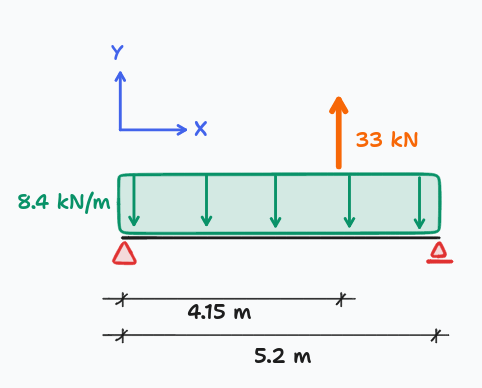

The beam is to have the following attributes:

```
Material:
    Steel: E=23000 MPa, nu=0.2, G=9585 MPa, rho=7.55e-5
Section:
    Iz = 400e6 mm**4
    The other parameters (J, A, Iy) can be whatever you wish since we are only analyzing this beam in flexure in the gravity direction
```

* Use `print()` to print the reactions
* Plot the shear diagram
* Plot the moment diagram

## Task 01 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+-----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |  Sum MZ  |  Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+-----------+
|     Combo 1      |   0    |   0    | -1.07e+04 | 1.07e+04 |   0    |   0    |   0    |    0    |   0    |    0    | 2.34e+07 | -2.34e+07 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+-----------+

{'Combo 1': 15176.538461538461}
{'Combo 1': -4496.538461538461}


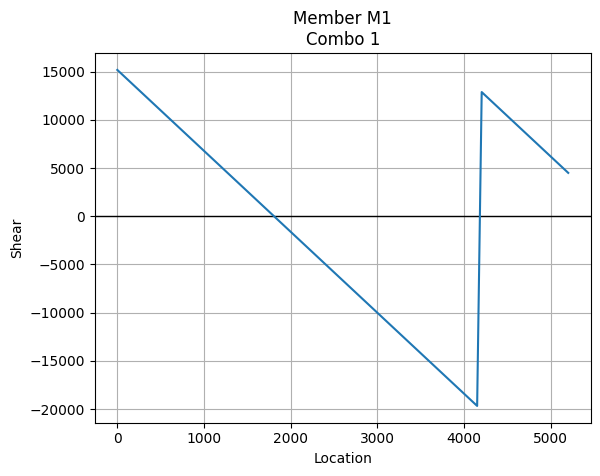

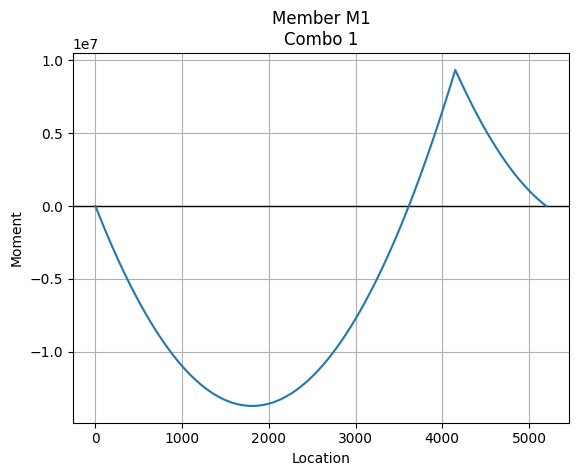

In [2]:
# This is me completing the workbook
beam_model = FEModel3D()

E = 23000     # Modulus of elasticity (MPa)
nu = 0.2      # Poisson's ratio
G = 9585      # Shear modulus of elasticity (MPa)
rho = 7.55e-5  # Density
beam_model.add_material('Steel', E, G, nu, rho)

beam_model.add_node(name="node1", X=0, Y=0, Z=0) # Length in mm
beam_model.add_node("node2", 5200, 0, 0)

beam_model.add_member(name="M1", i_node="node1", j_node="node2", material="Steel", Iy=20e6, Iz=400e6, J=30e3, A=1500)

beam_model.def_support("node1", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
beam_model.def_support("node2", False, True, True, False, False, False)

beam_model.add_member_dist_load("M1", "Fy", w1=-8.4, w2=-8.4, x1=0, x2=5200)

beam_model.add_member_pt_load(Member="M1", Direction="Fy", P=33000, x=4150)

beam_model.analyze(check_statics=True)

print(beam_model.Nodes['node1'].RxnFY)
print(beam_model.Nodes['node2'].RxnFY)

beam_model.Members['M1'].plot_shear('Fy', n_points=100)
beam_model.Members['M1'].plot_moment('Mz', n_points=100)

render_model(beam_model, deformed_shape=True, annotation_size=100)

# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. For PyNite, you will also need $\nu$, G, and $\rho$. Use `0.2`, `9585` MPa, and `2.4e-5` N/mm**3 for these values, respectively. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  | Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
|       LC1        |   0    |   0    | -1.56e+04 | 1.56e+04 |   0    |   0    |   0    |    0    |   0    |    0    |  -2.8e+07 | 2.8e+07  |
|       LC2        |   0    |   0    | -4.07e+05 | 4.07e+05 |   0    |   0    |   0    |    0    |   0    |    0    | -8.02e+08 | 8.02e+08 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+

{'LC1': 15552.0, 'LC2': 406552.0}
{'LC1': 27993600.000000007, 'LC2': 801793600.0000001}


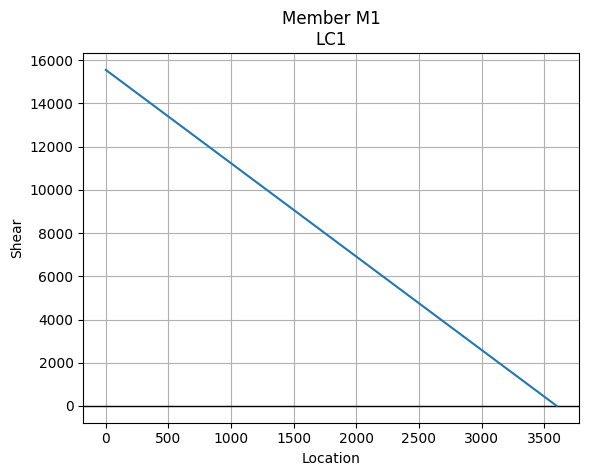

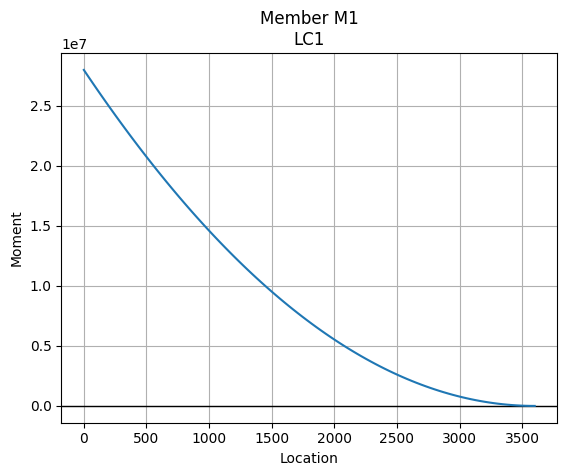

In [4]:
concretebeam_model = FEModel3D()

fcu = 45     # Compressive strength (MPa)
b = 300      # Width of beam (mm)
d = 600      # Depth of beam (mm)
l = 3600     # Length of beam (mm)
A=b*d        # Area of beam (mm2)

E = 22000*((fcu/10)**0.3)     # Modulus of elasticity (MPa)
nu = 0.2      # Poisson's ratio
G = 9585      # Shear modulus of elasticity (MPa)
rho = 2.4e-5  # Density (N/mm3)

w = A*rho           # Beam self-weight (kN/m)
Izz = (b*d**3)/12   # Moment of inertia about the local z-axis (mm6)
Iyy = (d*b**3)/12   # Moment of inertia about the local y-axis (mm6)
Jb=Iyy+Izz          # Polar moment of inertia (mm6)


concretebeam_model.add_material('Concrete', E, G, nu, rho)

concretebeam_model.add_node(name="node1", X=0, Y=0, Z=0) # Length (mm)
concretebeam_model.add_node("node2", l, 0, 0)

concretebeam_model.add_member(name="M1", i_node="node1", j_node="node2", material='Concrete', Iy=Iyy, Iz=Izz, J=Jb, A=Ae)

concretebeam_model.def_support("node1", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=True, support_RZ=True)
concretebeam_model.def_support("node2", False, False, False, False, False, False)

#concretebeam_model.add_load_combo(name="LC1", factors={"D": 1.4})
#concretebeam_model.add_load_combo("LC2", {"D": 1.25, "L": 1.5})

concretebeam_model.add_load_combo(name="LC1", factors={"D": 1.0})
concretebeam_model.add_load_combo("LC2", {"D": 1.00, "L": 1.0})

concretebeam_model.add_member_dist_load("M1", Direction="Fy", w1=-w, w2=-w, x1=0, x2=l, case="D")
concretebeam_model.add_member_dist_load("M1", "Fy", w1=-60, w2=-60, x1=0, x2=l, case="L")

concretebeam_model.add_member_pt_load(Member="M1", Direction="Fy", P=-175000, x=2200, case="L")

concretebeam_model.analyze(check_statics=True)

print(concretebeam_model.Nodes['node1'].RxnFY)
print(concretebeam_model.Nodes['node1'].RxnMZ)

concretebeam_model.Members['M1'].plot_shear('Fy', combo_name="LC1", n_points=100)
concretebeam_model.Members['M1'].plot_moment('Mz', combo_name="LC1", n_points=100)

render_model(concretebeam_model, deformed_shape=True, combo_name='LC1', annotation_size=100)

# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* Use the same steel material from above and use Iz=854e6 ${mm^4}$
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 mm
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  | Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
|     Combo 1      |   0    |   0    | -3.15e+04 | 3.15e+04 |   0    |   0    |   0    |    0    |   0    |    0    | -4.07e+07 | 4.07e+07 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+

{'Combo 1': 17015.10804129708}
{'Combo 1': 19752.146029047442}
{'Combo 1': -5287.254070344548}


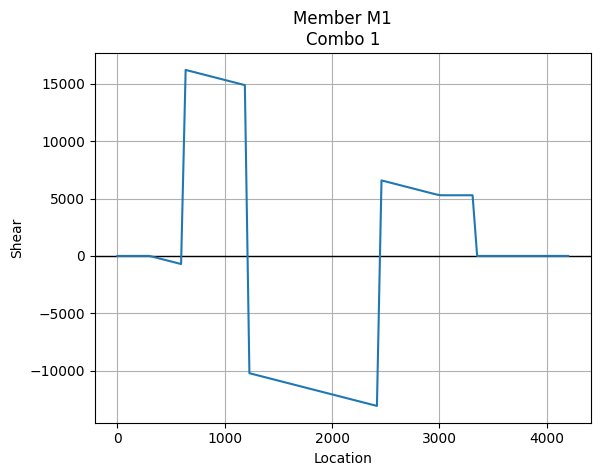

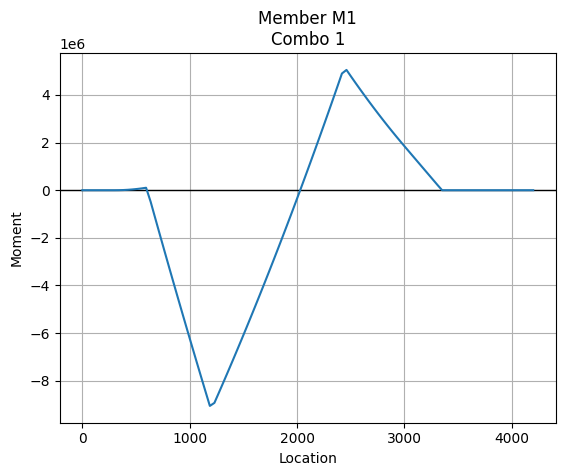

In [5]:
steelbeam_model = FEModel3D()

E = 23000     # Modulus of elasticity (MPa)
nu = 0.2      # Poisson's ratio
G = 9585      # Shear modulus of elasticity (MPa)
rho = 7.55e-5  # Density
steelbeam_model.add_material('Steel', E, G, nu, rho)

steelbeam_model.add_node(name="node1", X=0, Y=0, Z=0) # Length in mm
steelbeam_model.add_node("node2", 600, 0, 0)
steelbeam_model.add_node("node3", 2440, 0, 0)
steelbeam_model.add_node("node4", 3350, 0, 0)
steelbeam_model.add_node("node5", 4200, 0, 0)

steelbeam_model.add_member(name="M1", i_node="node1", j_node="node5", material="Steel", Iy=20e6, Iz=854e6, J=30e3, A=1500)

steelbeam_model.def_support("node2", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
steelbeam_model.def_support("node3", False, True, True, False, False, False)
steelbeam_model.def_support("node4", False, True, True, False, False, False)

steelbeam_model.add_member_dist_load("M1", "Fy", w1=-2.4, w2=-2.4, x1=300, x2=3000)

steelbeam_model.add_member_pt_load(Member="M1", Direction="Fy", P=-25000, x=1200)

steelbeam_model.analyze(check_statics=True)

print(steelbeam_model.Nodes['node2'].RxnFY)
print(steelbeam_model.Nodes['node3'].RxnFY)
print(steelbeam_model.Nodes['node4'].RxnFY)

steelbeam_model.Members['M1'].plot_shear('Fy', n_points=100)
steelbeam_model.Members['M1'].plot_moment('Mz', n_points=100)

render_model(steelbeam_model, deformed_shape=True, annotation_size=80)